# mixed coordinate cutting plane examples

arbitrary grid data

yt : [INFO     ] 2024-03-04 21:00:29,045 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-04 21:00:29,045 Parameters: domain_dimensions         = [20 20 20]
yt : [INFO     ] 2024-03-04 21:00:29,046 Parameters: domain_left_edge          = [0.5        0.52359878 0.34906585]
yt : [INFO     ] 2024-03-04 21:00:29,046 Parameters: domain_right_edge         = [1.         1.04719755 0.6981317 ]
yt : [INFO     ] 2024-03-04 21:00:29,047 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-04 21:00:29,148 xlim = 0.250000 0.866025
yt : [INFO     ] 2024-03-04 21:00:29,148 ylim = 0.250000 0.866025
yt : [INFO     ] 2024-03-04 21:00:29,148 Setting origin='native' for spherical geometry.
yt : [INFO     ] 2024-03-04 21:00:29,151 xlim = 0.250000 0.866025
yt : [INFO     ] 2024-03-04 21:00:29,151 ylim = 0.250000 0.866025
yt : [INFO     ] 2024-03-04 21:00:29,154 Making a fixed resolution buffer of (('stream', 'dim_theta')) 800 by 800



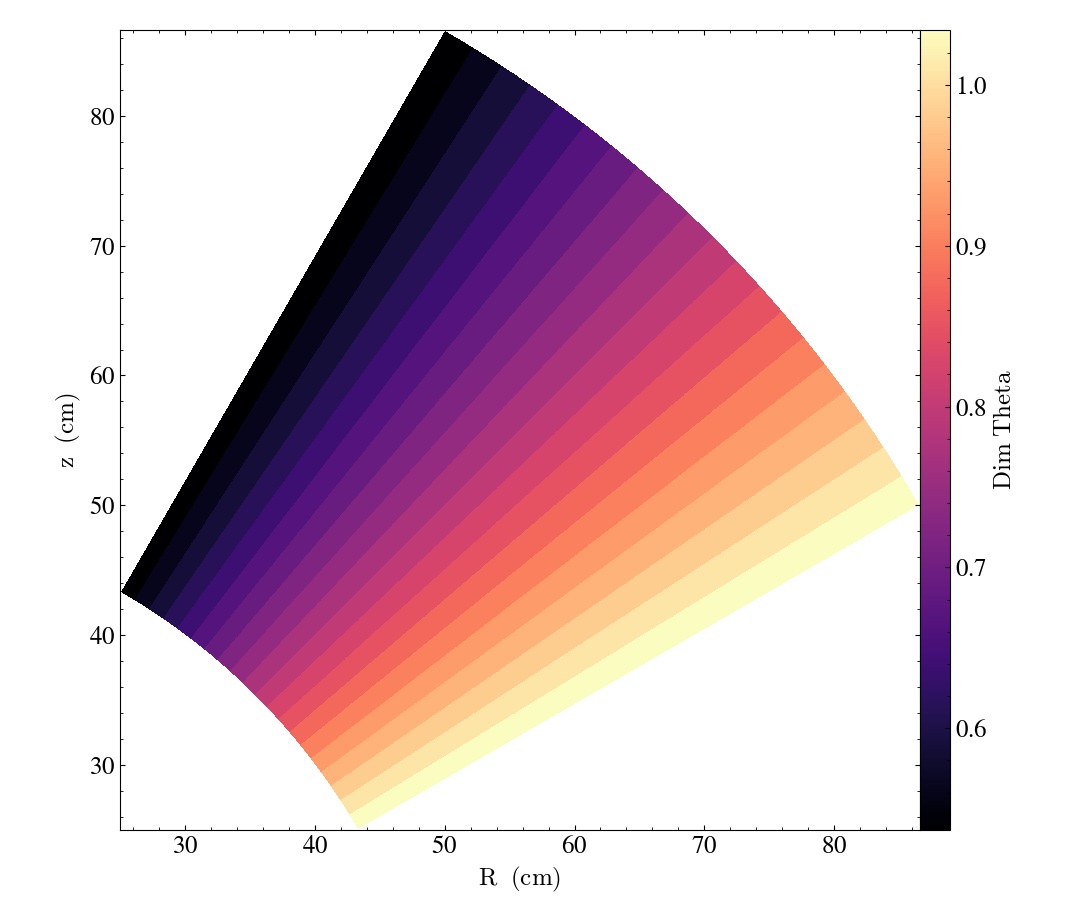

yt : [INFO     ] 2024-03-04 21:00:29,791 Making a fixed resolution buffer of (dim_theta) 600 by 600


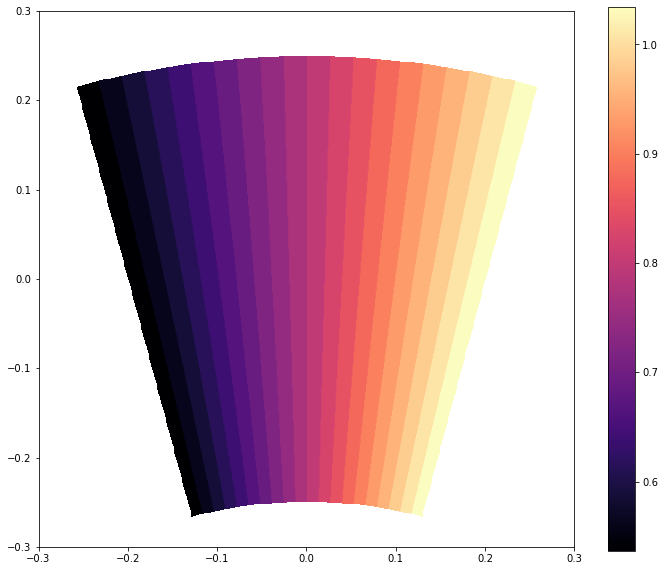

yt : [INFO     ] 2024-03-04 21:00:29,986 Making a fixed resolution buffer of (dim_r) 600 by 600


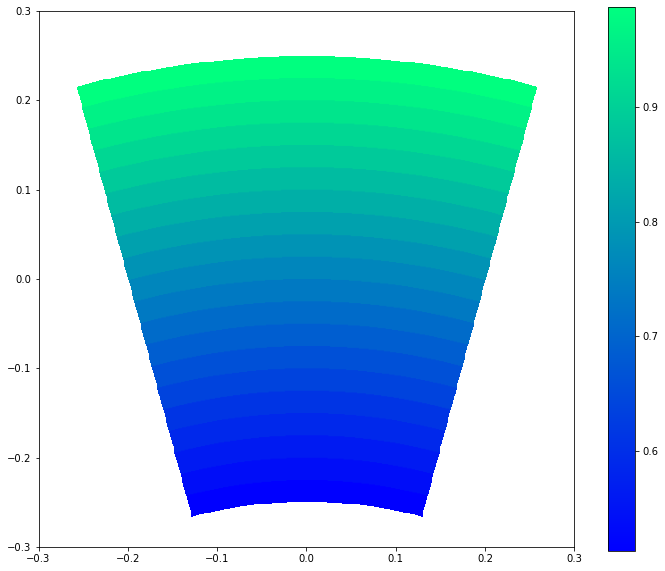

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import yt 
import unyt
from yt.utilities.lib.coordinate_utilities import spherical_points_to_cartesian

bbox = np.array([[0.5, 1.0], 
                [30, 60], 
                [20, 40]])
bbox[1:,:] = bbox[1:,:] * np.pi/180

def _get_slice_func(field_name):
    def _slicing_dim(field, data): 
        indx_fld = field_name.split('_')[-1]    
        d = data[('index', indx_fld)].d
        return unyt.unyt_array(d, "dimensionless")
    return _slicing_dim

shp = (20, 20, 20)
data = {'density': np.random.random(shp)}

ds = yt.load_uniform_grid(data, 
                          shp, 
                          bbox=bbox, 
                          geometry='spherical', 
                          axis_order=('r', 'theta', 'phi'), 
                          length_unit='m', nprocs=1)

for fld in ('theta', 'phi', 'r'):
    ds.add_field(name=('stream', f"dim_{fld}"),
                 function=_get_slice_func(f"dim_{fld}"), 
                 sampling_type='cell', 
                 units='dimensionless', 
                 take_log=False)

slc = yt.SlicePlot(ds, 'phi', 'dim_theta')
slc.set_cmap('dim_theta', 'magma')
slc.show()


phi_val = ds.domain_center.d[2] # problems??
# phi_val = .5235987755982988 # problems
# phi_val = .5235987756 # no problems
pt1 = np.array([1.0, ds.domain_left_edge[1].d, phi_val])
pt2 = np.array([1.0, ds.domain_right_edge[1].d, phi_val])
c = np.array([0.75, ds.domain_center[1].d, phi_val])

pts = np.column_stack([pt1, pt2, c])
x, y, z = spherical_points_to_cartesian(pts[0,:], pts[1,:], pts[2,:])
normal = -np.cross((x[0], y[0], z[0]), (x[1], y[1], z[1]) )
center = np.array([x[2], y[2], z[2]])
north_vector = center

slc = ds.cutting_mixed(normal, center, north_vector=north_vector)
frb = slc.to_frb(.6, 600)
vals = frb['dim_theta']
vals[~frb.get_mask('dim_theta')] = np.nan
fig = plt.figure(figsize=(12,10))
plt.imshow(vals, extent=frb.bounds, origin='lower', cmap='magma')
plt.colorbar()
plt.show()

vals = frb['dim_r']
vals[~frb.get_mask('dim_r')] = np.nan
fig = plt.figure(figsize=(12,10))
plt.imshow(vals, extent=frb.bounds, origin='lower', cmap='winter')
plt.colorbar()
plt.show()

using a 3d spherical, yt sample dataset (KeplerianDisk)

yt : [INFO     ] 2024-03-04 21:00:42,389 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/KeplerianDisk/disk.out1.00000.athdf'
yt : [WARNING  ] 2024-03-04 21:00:42,459 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2024-03-04 21:00:42,459 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2024-03-04 21:00:42,460 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2024-03-04 21:00:42,460 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-03-04 21:00:42,515 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-04 21:00:42,516 Parameters: domain_dimensions         = [256  64   4]
yt : [INFO     ] 2024-03-04 21:00:42,516 Parameters: domain_left_edge          = [0.3        1.17809725 0.        ]
yt : [INFO     ] 2024-03-04 21:00:42,516 Parameters: domain_right_edge         = [3.         1.96349541 6.28318531]
yt : [INFO     ] 2024-03-04 21:00:42,517 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-04 21:00:42,519 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by

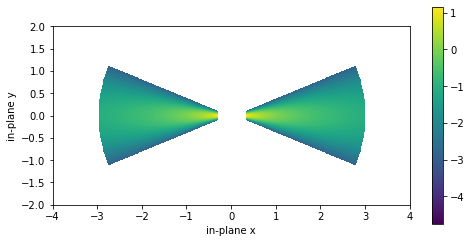

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt 

# load a dataset in 3d spherical coordinates
ds = yt.load_sample("KeplerianDisk")

# define a cartesian plane (in cartesian coordinates)
# the following plane will be the x-z plane
normal = np.array([0.0, 1.0, 0.0])
plane_center = np.array([0.0, 0.0, 0.0])
slc = ds.cutting_mixed(normal, plane_center)

# extract a frb, width and height here are 
# in-plane cartesian distances measured from the 
# plane_center
frb = slc.to_frb(8.0, 800, height=4.0)
bvals = frb[("athena_pp", "dens")]

# mask out empty values for plotting
mask = frb.get_mask(("athena_pp", "dens"))
bvals[~mask] = np.nan

# plot it
f = plt.figure(figsize=(8,4))
plt.imshow(np.log10(bvals), extent=frb.bounds, origin='lower')
plt.xlabel("in-plane x")
plt.ylabel("in-plane y")
plt.colorbar()